In [2]:
import pandas as pd

data = pd.DataFrame()

YEAR = 2023

data = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/' \
                   'play_by_play_' + str(YEAR) + '.csv.gz',
                   compression= 'gzip', low_memory= False)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

In [23]:
filtered_df = data[(data['home_team'] == 'PHI') | (data['away_team'] == 'PHI')]

In [24]:
# Apply the filters
final_filtered_df = filtered_df[
    (filtered_df['play_type'] == 'pass') &
    (filtered_df['pass_length'] == 'short') &
    ((filtered_df['pass_location'] == 'left') | (filtered_df['pass_location'] == 'right')) &
    (filtered_df['air_yards'] <= 1) &
    (filtered_df['passer_player_name'] == 'J.Hurts')
]

In [25]:
pd.set_option('display.max_colwidth', None)

final_filtered_df.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [26]:
num_rows = len(final_filtered_df)
print("Number of rows:", num_rows)

Number of rows: 144


In [27]:
# Summing the 'yards_gained' column

total_yards_gained = final_filtered_df['yards_gained'].sum()
total_yards_gained


600.0

In [29]:
# Running similar calculations for the Dallas Cowboys
dallas_filtered_df = data[(data['home_team'] == 'DAL') | (data['away_team'] == 'DAL')]

dallas_final_filtered_df = dallas_filtered_df[
    (dallas_filtered_df['play_type'] == 'pass') &
    (dallas_filtered_df['pass_length'] == 'short') &
    ((dallas_filtered_df['pass_location'] == 'left') | (dallas_filtered_df['pass_location'] == 'right')) &
    (dallas_filtered_df['air_yards'] <= 1) &
    (dallas_filtered_df['passer_player_name'] == 'D.Prescott')
]

dallas_num_rows = len(dallas_final_filtered_df)
print("Number of screen passes:", dallas_num_rows)

dallas_total_yards_gained = dallas_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",dallas_total_yards_gained)


Number of screen passes: 149
Total yards gained on screens: 576.0


In [30]:
# Same calcs for the 49ers
sf_filtered_df = data[(data['home_team'] == 'SF') | (data['away_team'] == 'SF')]

sf_final_filtered_df = sf_filtered_df[
    (sf_filtered_df['play_type'] == 'pass') &
    (sf_filtered_df['pass_length'] == 'short') &
    ((sf_filtered_df['pass_location'] == 'left') | (sf_filtered_df['pass_location'] == 'right')) &
    (sf_filtered_df['air_yards'] <= 1) &
    (sf_filtered_df['passer_player_name'] == 'B.Purdy')
]

sf_num_rows = len(sf_final_filtered_df)
print("Number of screen passes:", sf_num_rows)

sf_total_yards_gained = sf_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",sf_total_yards_gained)


Number of screen passes: 82
Total yards gained on screens: 565.0


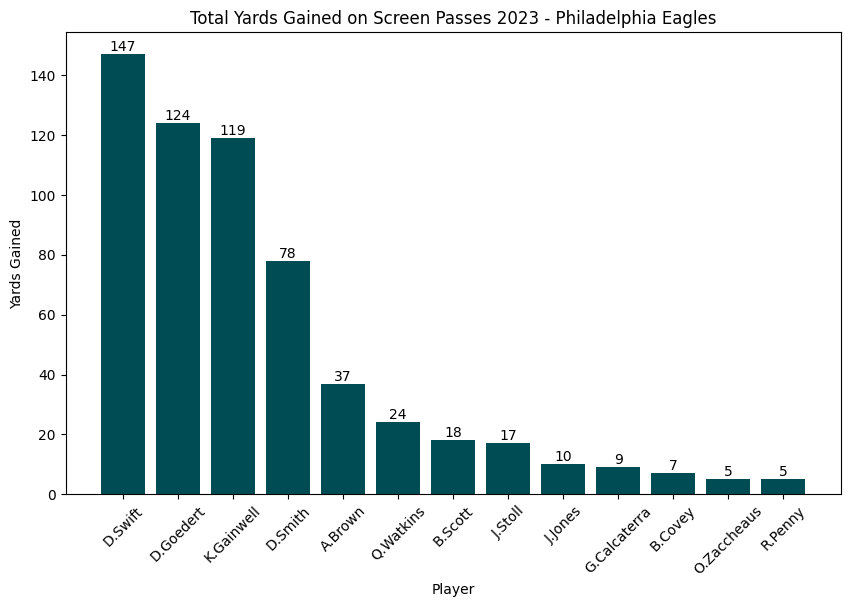

In [17]:
# total yards gained on screens by player
import matplotlib.pyplot as plt

grouped_data = final_filtered_df.groupby('receiver_player_name')['yards_gained'].sum().reset_index()

grouped_data_sorted = grouped_data.sort_values(by='yards_gained', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data_sorted['receiver_player_name'], grouped_data_sorted['yards_gained'], color='#004C54')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Player')
plt.ylabel('Yards Gained')
plt.title('Total Yards Gained on Screen Passes 2023 - Philadelphia Eagles')
plt.xticks(rotation=45)
plt.show()


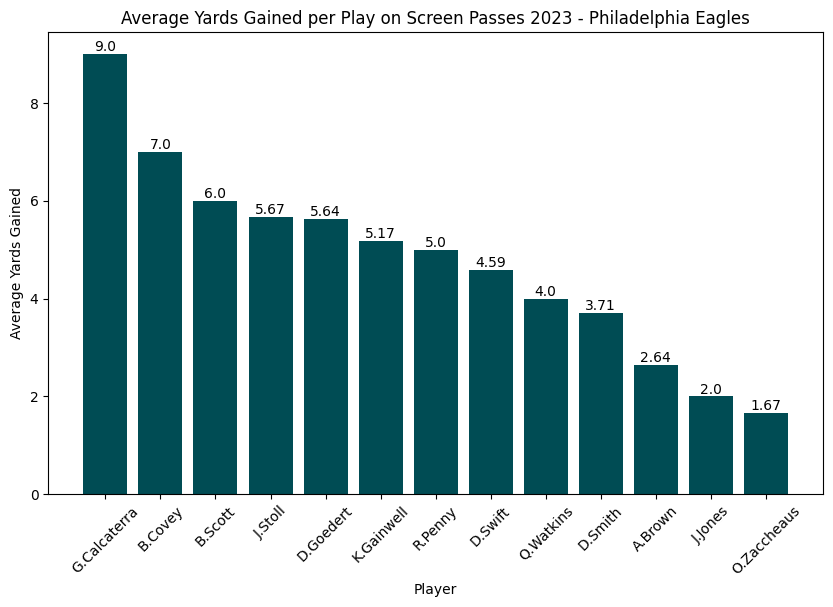

In [20]:
# average yards gained per player on screens
avg_yards_by_receiver = final_filtered_df.groupby('receiver_player_name')['yards_gained'].mean()

avg_yards_by_receiver_sorted = avg_yards_by_receiver.sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(avg_yards_by_receiver_sorted.index, avg_yards_by_receiver_sorted.values, color='#004C54')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.xlabel('Player')
plt.ylabel('Average Yards Gained')
plt.title('Average Yards Gained per Play on Screen Passes 2023 - Philadelphia Eagles')
plt.xticks(rotation=45)
plt.show()


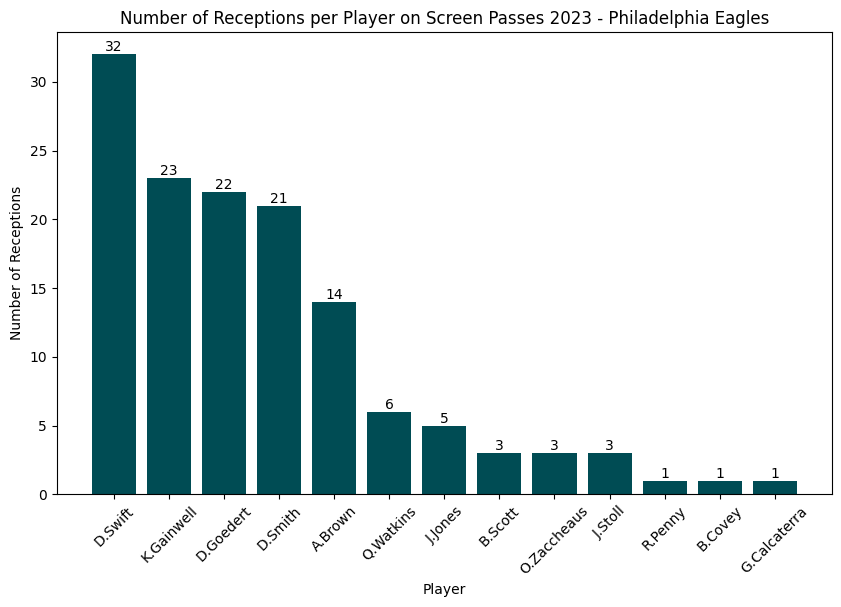

In [21]:
# Number of receptions per player on screens
receptions_by_player = final_filtered_df['receiver_player_name'].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(receptions_by_player.index, receptions_by_player.values, color='#004C54')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Player')
plt.ylabel('Number of Receptions')
plt.title('Number of Receptions per Player on Screen Passes 2023 - Philadelphia Eagles')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Same calcs for the 49ers
sf_filtered_df = data[(data['home_team'] == 'CAR') | (data['away_team'] == 'CAR')]

sf_final_filtered_df = sf_filtered_df[
    (sf_filtered_df['play_type'] == 'pass') &
    (sf_filtered_df['pass_length'] == 'short') &
    ((sf_filtered_df['pass_location'] == 'left') | (sf_filtered_df['pass_location'] == 'right')) &
    (
    (sf_filtered_df['passer_player_name'] == 'B.Young') 
     | (sf_filtered_df['passer_player_name'] == 'A.Dalton')) 
     &
    (sf_filtered_df['air_yards'] <= 1) 
]

sf_num_rows = len(sf_final_filtered_df)
print("Number of screen passes:", sf_num_rows)

sf_total_yards_gained = sf_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",sf_total_yards_gained)


Number of screen passes: 136
Total yards gained on screens: 485.0


In [20]:
# Same calcs for the 49ers
sf_filtered_df = data[(data['home_team'] == 'CHI') | (data['away_team'] == 'CHI')]

sf_final_filtered_df = sf_filtered_df[
    (sf_filtered_df['play_type'] == 'pass') &
    (sf_filtered_df['pass_length'] == 'short') &
    ((sf_filtered_df['pass_location'] == 'left') | (sf_filtered_df['pass_location'] == 'right')) &
    (
    (sf_filtered_df['passer_player_name'] == 'T.Bagent') 
     | (sf_filtered_df['passer_player_name'] == 'J.Fields')) 
     &
    (sf_filtered_df['air_yards'] <= 1) 
]

sf_num_rows = len(sf_final_filtered_df)
print("Number of screen passes:", sf_num_rows)

sf_total_yards_gained = sf_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",sf_total_yards_gained)


Number of screen passes: 143
Total yards gained on screens: 542.0


In [21]:
# Same calcs for the 49ers
sf_filtered_df = data[(data['home_team'] == 'CIN') | (data['away_team'] == 'CIN')]

sf_final_filtered_df = sf_filtered_df[
    (sf_filtered_df['play_type'] == 'pass') &
    (sf_filtered_df['pass_length'] == 'short') &
    ((sf_filtered_df['pass_location'] == 'left') | (sf_filtered_df['pass_location'] == 'right')) &
    (
    (sf_filtered_df['passer_player_name'] == 'J.Burrow') 
     | (sf_filtered_df['passer_player_name'] == 'J.Browning')) 
     &
    (sf_filtered_df['air_yards'] <= 1) 
]

sf_num_rows = len(sf_final_filtered_df)
print("Number of screen passes:", sf_num_rows)

sf_total_yards_gained = sf_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",sf_total_yards_gained)


Number of screen passes: 191
Total yards gained on screens: 878.0


In [24]:
# Same calcs for the 49ers
sf_filtered_df = data[(data['home_team'] == 'CLE') | (data['away_team'] == 'CLE')]

sf_final_filtered_df = sf_filtered_df[
    (sf_filtered_df['play_type'] == 'pass') &
    (sf_filtered_df['pass_length'] == 'short') &
    ((sf_filtered_df['pass_location'] == 'left') | (sf_filtered_df['pass_location'] == 'right')) &
    (
    (sf_filtered_df['passer_player_name'] == 'D.Watson') 
    | (sf_filtered_df['passer_player_name'] == 'J.Flacco')) 
    | ((sf_filtered_df['passer_player_name'] == 'D.Thompson-Robinson')) 
    | ((sf_filtered_df['passer_player_name'] == 'P.Walker')) 
    &
    (sf_filtered_df['air_yards'] <= 1) 
]

sf_num_rows = len(sf_final_filtered_df)
print("Number of screen passes:", sf_num_rows)

sf_total_yards_gained = sf_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",sf_total_yards_gained)


Number of screen passes: 310
Total yards gained on screens: 1556.0


In [25]:
# Same calcs for the 49ers
sf_filtered_df = data[(data['home_team'] == 'DEN') | (data['away_team'] == 'DEN')]

sf_final_filtered_df = sf_filtered_df[
    (sf_filtered_df['play_type'] == 'pass') &
    (sf_filtered_df['pass_length'] == 'short') &
    ((sf_filtered_df['pass_location'] == 'left') | (sf_filtered_df['pass_location'] == 'right')) &
    (
    (sf_filtered_df['passer_player_name'] == 'J.Stidham') 
     | (sf_filtered_df['passer_player_name'] == 'R.Wilson')) 
     &
    (sf_filtered_df['air_yards'] <= 1) 
]

sf_num_rows = len(sf_final_filtered_df)
print("Number of screen passes:", sf_num_rows)

sf_total_yards_gained = sf_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",sf_total_yards_gained)


Number of screen passes: 159
Total yards gained on screens: 747.0


In [26]:
# Same calcs for the 49ers
sf_filtered_df = data[(data['home_team'] == 'DET') | (data['away_team'] == 'DET')]

sf_final_filtered_df = sf_filtered_df[
    (sf_filtered_df['play_type'] == 'pass') &
    (sf_filtered_df['pass_length'] == 'short') &
    ((sf_filtered_df['pass_location'] == 'left') | (sf_filtered_df['pass_location'] == 'right')) &
    #(
    (sf_filtered_df['passer_player_name'] == 'J.Goff') 
    # | (sf_filtered_df['passer_player_name'] == 'R.Wilson')) 
     &
    (sf_filtered_df['air_yards'] <= 1) 
]

sf_num_rows = len(sf_final_filtered_df)
print("Number of screen passes:", sf_num_rows)

sf_total_yards_gained = sf_final_filtered_df['yards_gained'].sum()
print("Total yards gained on screens:",sf_total_yards_gained)


Number of screen passes: 145
Total yards gained on screens: 625.0
